# Convolutional Neural Network: Application

GOALS
- Create a mood classifier using TF Keras Sequential API
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *


%matplotlib inline
np.random.seed(1)

## Load the data and split into train/test sets

we`ll be using the happy house dataset for this part of the assignment, which contains images of people's faces. your task will be build a ConvNet that determines whether the people in the images are smiling or not - because they only get to enter the house if they're smiling.

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# normalize image vectors
X_train = X_train_orig / 255
X_test = X_test_orig / 255

# reshape 
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


#### You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

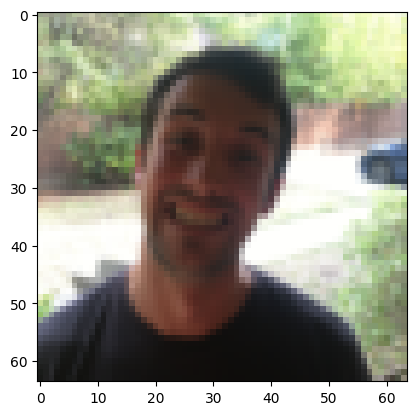

In [4]:
index = 5
plt.imshow(X_train_orig[index])
plt.show()

### Layers in TF Keras

In the last notebook, we created layers manually in numpy. In TF Keras, you don`t have to write code directly to create layers. Rather, TF Keras has pre-defined layers you can use.

When you create a layer in TF Keras, you are creating a function that takes some input and transforms it into an account you can reuse later,

### The Sequential API

In the previous notebook, we built helper functions using numpy to understand the mechanics behind convolutional networks. most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. 

Keras is an high level abstraction on top of tensorflowm which allows for even more simplified and optimized model creation and training.

### Happy Model

In [5]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)),
        tfl.Conv2D(32,(7,7)), # conv2d layer with 32 7*7 filters and stride of 1
        tfl.BatchNormalization(axis=-1),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
    ])
    
    return model

In [8]:
happy_model = happyModel()

happy_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
happy_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

### Train and Evaluate the model

after creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build.

Simply call .fit() to train.

In [10]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

2024-11-09 21:56:39.511811: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
38/38 [==============================] - 1s 25ms/step - loss: 0.8282 - accuracy: 0.7450
Epoch 2/10
38/38 [==============================] - 1s 23ms/step - loss: 0.2757 - accuracy: 0.8750
Epoch 3/10
38/38 [==============================] - 1s 23ms/step - loss: 0.2020 - accuracy: 0.9183
Epoch 4/10
38/38 [==============================] - 1s 23ms/step - loss: 0.2381 - accuracy: 0.9150
Epoch 5/10
38/38 [==============================] - 1s 23ms/step - loss: 0.1283 - accuracy: 0.9533
Epoch 6/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0811 - accuracy: 0.9633
Epoch 7/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0517 - accuracy: 0.9867
Epoch 8/10
38/38 [==============================] - 1s 23ms/step - loss: 0.1400 - accuracy: 0.9533
Epoch 9/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0714 - accuracy: 0.9750
Epoch 10/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0523 - accuracy: 0.9867


After that completes, just use .evaluate() to evaluate against the test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the mode. In this case, the binary_crossentropy and the accuracy respectively.

In [11]:
happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 1s 18ms/step - loss: 0.1648 - accuracy: 0.9333


[0.1647612452507019, 0.9333333373069763]

Easy right, But what if you need to build a model with shared layers, branches, or multiple inputs and outputs. This is where sequential, with its beautifull functionality wont be able to help you.

Next up: Enters the Functional API, your sligtly more comples, highly flexbile friend

### The Functional API

now, we`ll use keras functional api to build a convnet that can differentiate between 6 sign language digits.

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.

In [3]:
# Loading the signs data
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

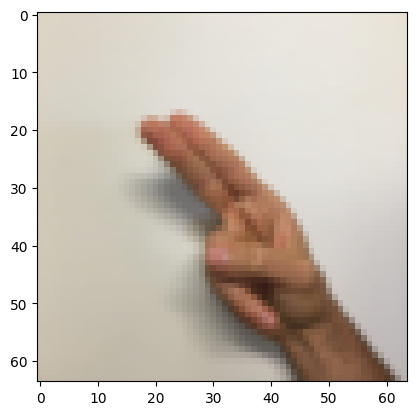

In [4]:
index = 14
plt.imshow(X_train_orig[index])

#### Split the data into train/test sets

In [5]:
# normalize the data
X_train = X_train_orig/255
X_test = X_test_orig/255

Y_train = convert_to_one_hot(Y_train_orig,6).T
Y_test = convert_to_one_hot(Y_test_orig,6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Forward Propagation

In [8]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    input_shape -- shape of input dataset

    Returns:
    model -- TF Keras model
    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8,4, activation='linear', padding='same', strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
    Z2 = tfl.Conv2D(16,2, activation='linear', padding='same', strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model

In [11]:
conv_model = convolutional_model((64,64,3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

conv_model.summary()

# this defines an expected structure for the model summary. Each entry in the list corresponds to a layer in the model
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_5 (ReLU)              (None, 8, 8, 16)          0         
                                                           

### Train the Model

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64) # this creates a `tf.data.Dataset` object from the provided tensors i.e X_train and Y_train
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64) # this line similar to the above line creates a dataset for testing
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset) # train the model

Epoch 1/100


2024-11-10 12:25:02.430806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [1080,6]
	 [[{{node Placeholder/_1}}]]
2024-11-10 12:25:02.616574: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


17/17 [==============================] - 1s 23ms/step - loss: 1.8468 - accuracy: 0.1667 - val_loss: 1.7937 - val_accuracy: 0.1667
Epoch 2/100
 7/17 [===========>..................] - ETA: 0s - loss: 1.7899 - accuracy: 0.1964

2024-11-10 12:25:03.006130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [120,6]
	 [[{{node Placeholder/_1}}]]


17/17 [==============================] - 0s 19ms/step - loss: 1.7870 - accuracy: 0.2139 - val_loss: 1.7820 - val_accuracy: 0.2000
Epoch 3/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7786 - accuracy: 0.2481 - val_loss: 1.7745 - val_accuracy: 0.2833
Epoch 4/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7712 - accuracy: 0.3204 - val_loss: 1.7676 - val_accuracy: 0.3167
Epoch 5/100
17/17 [==============================] - 0s 20ms/step - loss: 1.7641 - accuracy: 0.3546 - val_loss: 1.7597 - val_accuracy: 0.3750
Epoch 6/100
17/17 [==============================] - 0s 19ms/step - loss: 1.7558 - accuracy: 0.3796 - val_loss: 1.7517 - val_accuracy: 0.4083
Epoch 7/100
17/17 [==============================] - 0s 19ms/step - loss: 1.7448 - accuracy: 0.4028 - val_loss: 1.7381 - val_accuracy: 0.4583
Epoch 8/100
17/17 [==============================] - 0s 19ms/step - loss: 1.7312 - accuracy: 0.4250 - val_loss: 1.7261 - val_accuracy: 0.4667
Epoch 9/100
17/17 

### History Object
The history object is an output of the .fit() operation, and provides a record of all the loss and metric values in memory

In [16]:
history.history

{'loss': [1.8467531204223633,
  1.7870222330093384,
  1.7786134481430054,
  1.7712178230285645,
  1.7641348838806152,
  1.7558461427688599,
  1.744837999343872,
  1.7312443256378174,
  1.7153992652893066,
  1.6969592571258545,
  1.6742832660675049,
  1.64883291721344,
  1.619263768196106,
  1.5862524509429932,
  1.550053596496582,
  1.507691502571106,
  1.4607700109481812,
  1.413194179534912,
  1.3641277551651,
  1.320075273513794,
  1.2754038572311401,
  1.2340447902679443,
  1.1963169574737549,
  1.1595585346221924,
  1.1262946128845215,
  1.0949801206588745,
  1.06806218624115,
  1.0418792963027954,
  1.0190907716751099,
  0.9959306716918945,
  0.9770572185516357,
  0.9547299146652222,
  0.9381154775619507,
  0.9203709959983826,
  0.9038370251655579,
  0.8898098468780518,
  0.8731682300567627,
  0.8608072996139526,
  0.8454841375350952,
  0.834050178527832,
  0.8210062384605408,
  0.8096736073493958,
  0.7978572249412537,
  0.7885448336601257,
  0.7758756279945374,
  0.767816185951

Now visualize the loss over time using history.history

/var/folders/qj/_xr448610yg3dn_k91tss4s80000gn/T/ipykernel_2042/748468608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'}, inplace=True) # rename the columns for clarity
/var/folders/qj/_xr448610yg3dn_k91tss4s80000gn/T/ipykernel_2042/748468608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace=True) # rename the columns for clarity


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

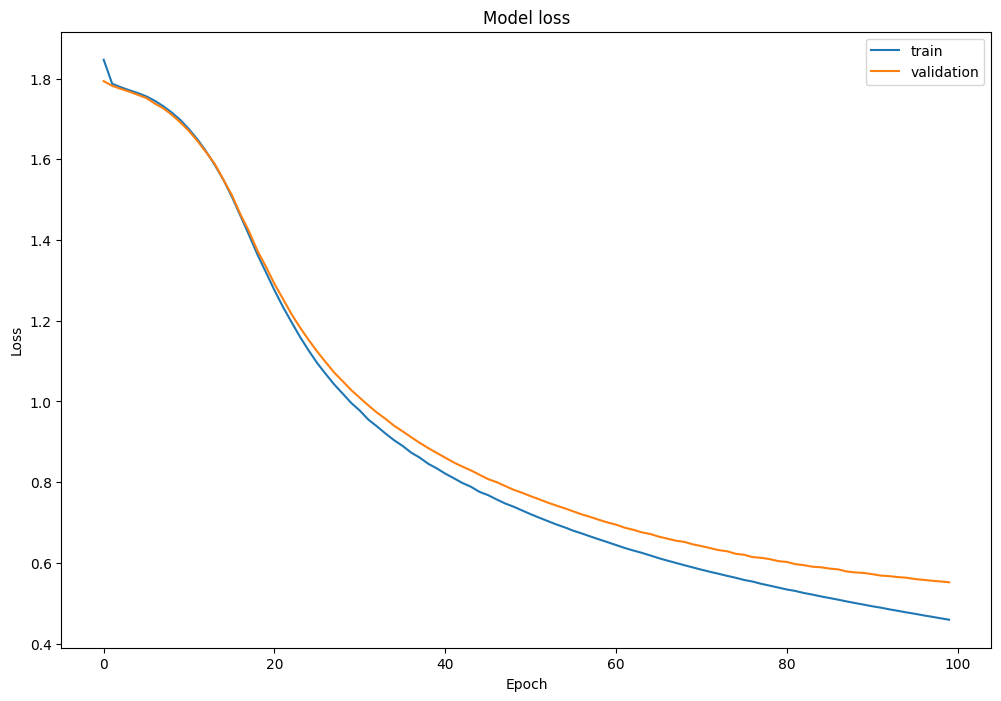

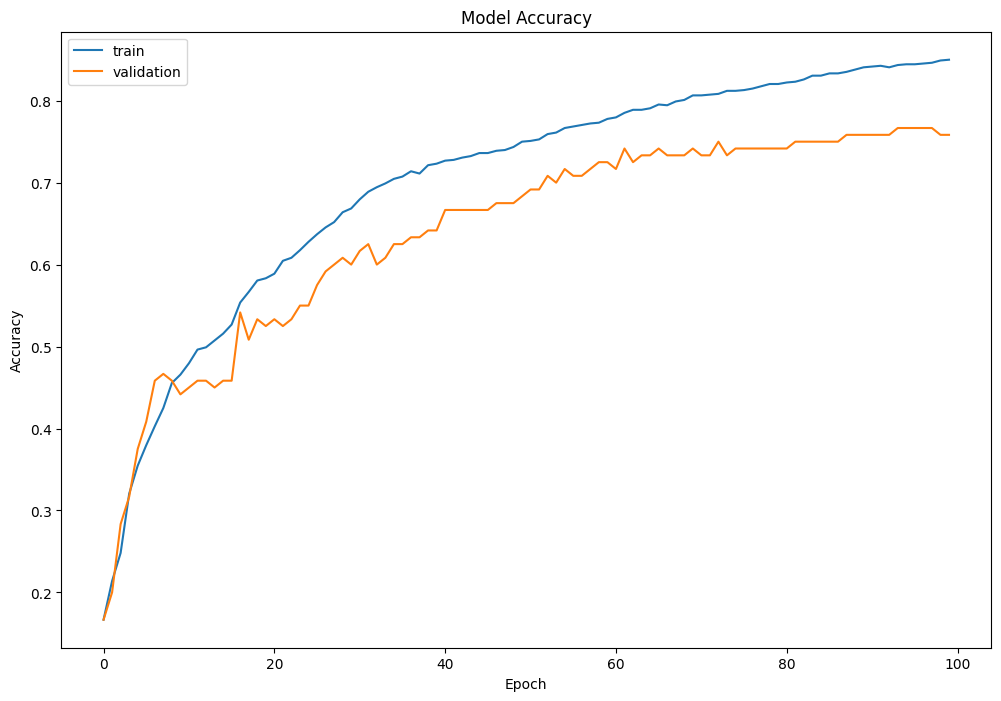

In [17]:
# The history.history['loss'] entry is a dictionary with as many values as epochs that the model was trained on 

# Create Dataframes for loss and accuracy
df_loss_acc = pd.DataFrame(history.history) # converts the `history.history` into a pandas dataframe, where each row corresponds to an epoch, and each col corresponds to a metric i.e loss or accuracy

# Loss Dataframe
df_loss = df_loss_acc[['loss','val_loss']]  # creates a new dataframe that contains the training loss and validation loss columns from `df_loss_acc`
df_loss.rename(columns={'loss':'train','val_loss':'validation'}, inplace=True) # rename the columns for clarity

# Accuract Dataframe
df_acc = df_loss_acc[['accuracy', 'val_accuracy']] # similar to loss dataframe, this creates a new dataframe that contains only the training accuracy and validation accuracy.
df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace=True) # rename the columns for clarity


# Plotting Loss and Accuracy
df_loss.plot(title='Model loss', figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy', figsize=(12, 8)).set(xlabel='Epoch', ylabel='Accuracy')